## 1. Import libraries, test data and split into training/test data sets

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('Salary_Data.csv')
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.35)

## 2. Train the Simple Linear Regression model

Use the training data set to test the model

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

## 3. Start predictions

Use the test data set to predict the previous trained model

In [3]:
y_pred = model.predict(x_test)

## 4. Display graph and details

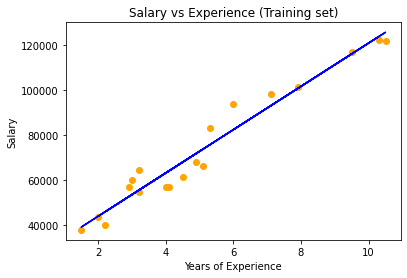

Coefficient b0:  24497.266686962474 

Coefficient b1:  9653.620709338611 



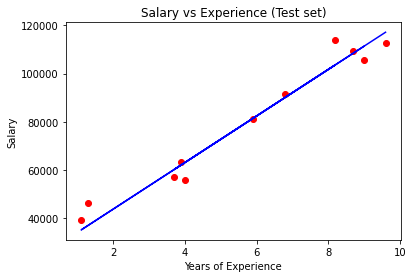

Least square error / Q(b0, b1):  326371018.0961416 

   x-values   y-value  y-predicted-value  residual_epsilon
0     [9.6]  112635.0      117172.025497      -4537.025497
1     [8.7]  109431.0      108483.766858        947.233142
2     [3.9]   63218.0       62146.387453       1071.612547
3     [1.1]   39343.0       35116.249467       4226.750533
4     [1.3]   46205.0       37046.973609       9158.026391
5     [4.0]   55794.0       63111.749524      -7317.749524
6     [8.2]  113812.0      103656.956504      10155.043496
7     [3.7]   57189.0       60215.663312      -3026.663312
8     [5.9]   81363.0       81453.628872        -90.628872
9     [6.8]   91738.0       90141.887510       1596.112490
10    [9.0]  105582.0      111379.853071      -5797.853071


In [9]:
from sklearn.metrics import mean_squared_error
from itertools import zip_longest

plt.scatter(x_train, y_train, color = 'orange')
plt.plot(x_train, model.predict(x_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

print('Coefficient b0: ', model.intercept_, '\n')
print('Coefficient b1: ', model.coef_[0], '\n')

plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_test, y_pred, color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

df = pd.DataFrame(list(zip_longest(x_test, y_test, y_pred, fillvalue=0)), columns=['x-values', 'y-value', 'y-predicted-value'])
df["residual_epsilon"] = (df['y-value'] - df['y-predicted-value'])

print('Least square error / Q(b0, b1): ', mean_squared_error(y_test, y_pred) * len(x_test), '\n')
print(df)